## **Implementation of Multi-Layer Perceptron (MLP) Classifier on the Iris Dataset with Optimized Parameters**

In [130]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [131]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [132]:
# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [133]:
# Showing dataset details
print("Dimensions of Dataset:", X.shape)

Dimensions of Dataset: (150, 4)


In [134]:
print("Available Categories:", iris.target_names)

Available Categories: ['setosa' 'versicolor' 'virginica']


In [135]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns:")
print("="*40)
print(df.dtypes)


Data Types of All Columns:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


In [136]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


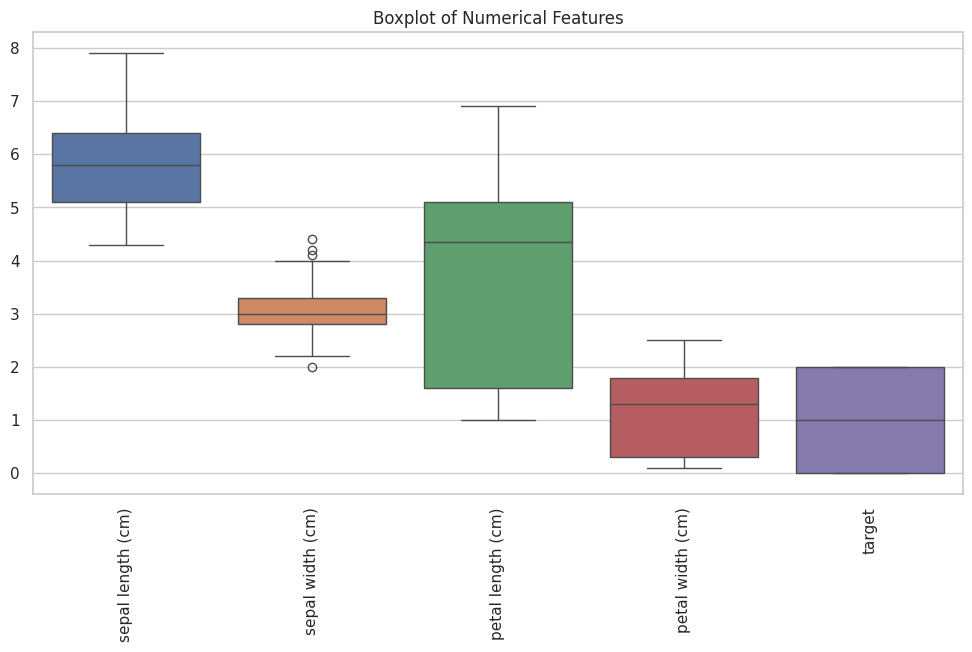

In [137]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

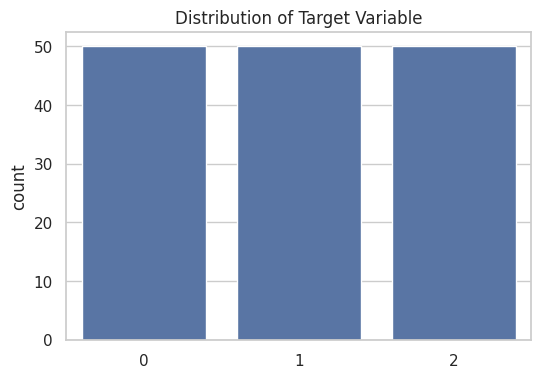

In [138]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.countplot(x=iris.target)
plt.title("Distribution of Target Variable")
plt.show()

In [139]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 1


In [140]:
df=df.drop_duplicates()

In [141]:
print(df.shape)
print(df.isnull().sum())

(149, 5)
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [142]:
#Split Data into Training & Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# # Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training shape:", X_train_scaled.shape)
print("Testing shape:", X_test_scaled.shape)

Training shape: (120, 4)
Testing shape: (30, 4)


In [144]:
# Step 4: Define the MLP Model
mlp = MLPClassifier(
hidden_layer_sizes=(16, 8),      # Increased hidden units for improved learning
activation='relu',                # Using ReLU for better gradient propagation
solver='adam',                # Adaptive optimization for efficient training
learning_rate_init=0.001,                # Optimized learning rate for stability
max_iter=1000,                # More iterations to ensure proper convergence
random_state=42,                # Fixed seed for reproducibility
verbose=True                # Display training progress for insights
)

In [145]:
mlp

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42,
              verbose=True)

In [146]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.20558721
Iteration 2, loss = 1.19641200
Iteration 3, loss = 1.18755884
Iteration 4, loss = 1.17902393
Iteration 5, loss = 1.17080339
Iteration 6, loss = 1.16289169
Iteration 7, loss = 1.15527934
Iteration 8, loss = 1.14793375
Iteration 9, loss = 1.14083774
Iteration 10, loss = 1.13389456
Iteration 11, loss = 1.12711171
Iteration 12, loss = 1.12044307
Iteration 13, loss = 1.11387072
Iteration 14, loss = 1.10729064
Iteration 15, loss = 1.10068705
Iteration 16, loss = 1.09392537
Iteration 17, loss = 1.08680503
Iteration 18, loss = 1.07918421
Iteration 19, loss = 1.07156830
Iteration 20, loss = 1.06410793
Iteration 21, loss = 1.05664630
Iteration 22, loss = 1.04911914
Iteration 23, loss = 1.04171239
Iteration 24, loss = 1.03435865
Iteration 25, loss = 1.02702596
Iteration 26, loss = 1.01973058
Iteration 27, loss = 1.01245446
Iteration 28, loss = 1.00524448
Iteration 29, loss = 0.99807887
Iteration 30, loss = 0.99102051
Iteration 31, loss = 0.98403352
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42,
              verbose=True)

In [147]:
#Make Predictions
y_pred = mlp.predict(X_test)

In [148]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



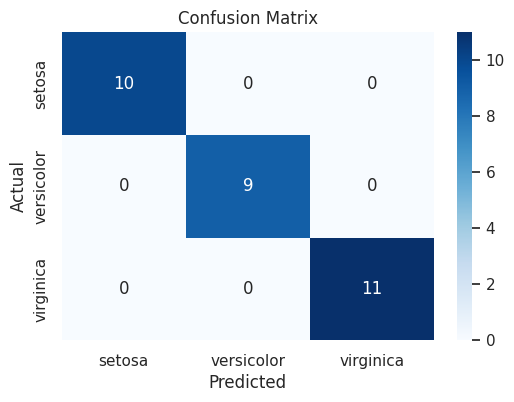

In [149]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [150]:
# Predict probabilities
probs = mlp.predict_proba(X_test)  # Softmax probabilities
print(probs[:5][1])  # Display first 5 predictions

[9.96257861e-01 3.74213425e-03 5.09294582e-09]


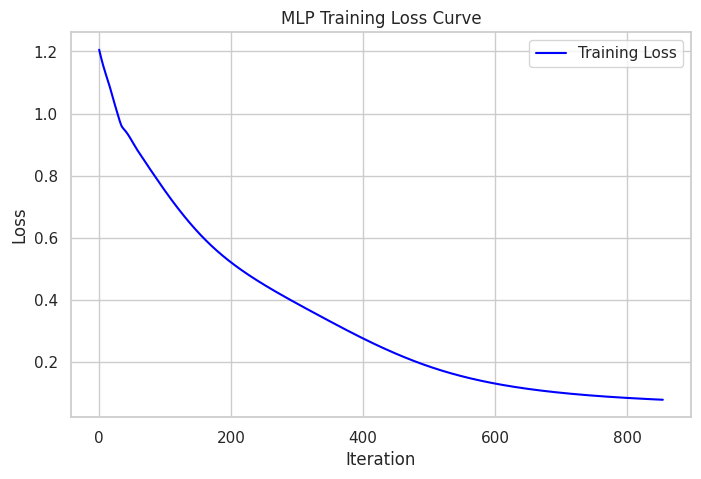

In [151]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss', color='blue')
plt.title("MLP Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

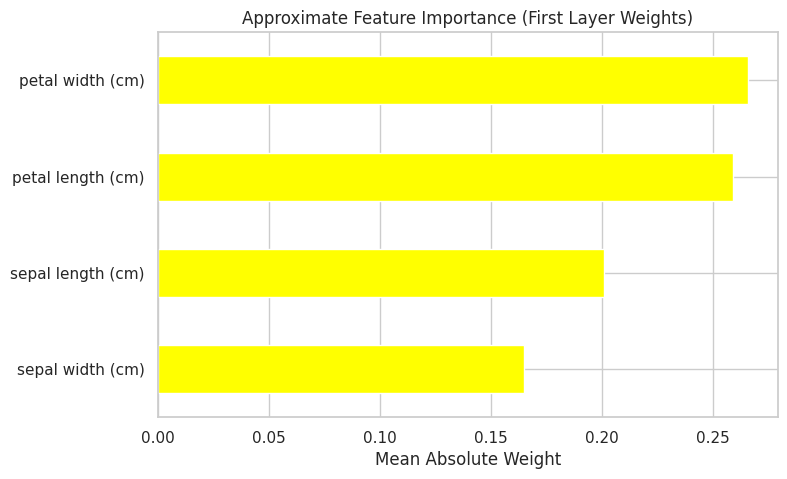

In [152]:
# Approximate feature importance using weights (simplified)
weights_first_layer = np.abs(mlp.coefs_[0]).mean(axis=1)
feature_importance = pd.Series(weights_first_layer, index=iris.feature_names)

# Plot feature importance
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color='yellow')
plt.title("Approximate Feature Importance (First Layer Weights)")
plt.xlabel("Mean Absolute Weight")
plt.show()